In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import keras
# from keras import layers, optimizers, losses, Model
# from aeon import datasets
import os
# from tqdm import tqdm
import pickle
from input.reading_datasets import get_all_datasets, read_dataset_from_file
import seaborn as sns
from preprocessing.get_dummies_labels import GetDummiesLabels
from preprocessing.train_test_split_module import TrainTestSplit
from models.multi_layer_perceptron import MultiLayerPerceprtron
import shutil

tf.config.list_physical_devices('GPU')

2024-08-28 16:25:20.714385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-28 16:25:20.721134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 16:25:20.728968: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 16:25:20.731286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 16:25:20.737113: I tensorflow/core/platform/cpu_feature_guar

[]

In [2]:
# get_all_datasets(read_from_path=False)

  0%|          | 0/30 [00:00<?, ?it/s]

ArticularyWordRecognition


  3%|▎         | 1/30 [00:04<02:08,  4.43s/it]

AtrialFibrillation


  7%|▋         | 2/30 [00:06<01:27,  3.11s/it]

BasicMotions
CharacterTrajectories


 13%|█▎        | 4/30 [00:25<03:07,  7.23s/it]

Cricket


 17%|█▋        | 5/30 [00:29<02:31,  6.07s/it]

DuckDuckGeese


 20%|██        | 6/30 [00:43<03:23,  8.47s/it]

EigenWorms


 23%|██▎       | 7/30 [01:17<06:16, 16.36s/it]

Epilepsy


 27%|██▋       | 8/30 [01:20<04:27, 12.17s/it]

EthanolConcentration


 30%|███       | 9/30 [01:56<06:45, 19.33s/it]

ERing


 33%|███▎      | 10/30 [01:58<04:42, 14.13s/it]

FaceDetection


 37%|███▋      | 11/30 [02:57<08:47, 27.75s/it]

FingerMovements


 40%|████      | 12/30 [03:00<06:05, 20.32s/it]

HandMovementDirection


 43%|████▎     | 13/30 [03:05<04:24, 15.58s/it]

Handwriting


 47%|████▋     | 14/30 [03:08<03:09, 11.86s/it]

Heartbeat


 50%|█████     | 15/30 [03:20<02:57, 11.81s/it]

JapaneseVowels
Libras


 57%|█████▋    | 17/30 [03:22<01:29,  6.86s/it]

LSST


 60%|██████    | 18/30 [03:26<01:14,  6.24s/it]

InsectWingbeat


 63%|██████▎   | 19/30 [04:54<05:04, 27.66s/it]

The dataset InsectWingbeat was not downloaded, due to That compression method is not supported
MotorImagery


 67%|██████▋   | 20/30 [05:11<04:06, 24.67s/it]

NATOPS


 70%|███████   | 21/30 [05:18<02:58, 19.81s/it]

PenDigits


 73%|███████▎  | 22/30 [05:21<01:58, 14.86s/it]

PEMS-SF


 77%|███████▋  | 23/30 [05:54<02:22, 20.33s/it]

Phoneme


 80%|████████  | 24/30 [06:49<03:02, 30.35s/it]

RacketSports


 83%|████████▎ | 25/30 [06:51<01:50, 22.13s/it]

SelfRegulationSCP1


 87%|████████▋ | 26/30 [06:56<01:07, 16.92s/it]

SelfRegulationSCP2


 90%|█████████ | 27/30 [07:00<00:38, 12.96s/it]

SpokenArabicDigits


 93%|█████████▎| 28/30 [07:12<00:25, 12.77s/it]

StandWalkJump


 97%|█████████▋| 29/30 [07:14<00:09,  9.70s/it]

UWaveGestureLibrary


100%|██████████| 30/30 [07:21<00:00, 14.71s/it]


Download completed


{'ArticularyWordRecognition': (array([[[ 0.87159 ,  0.88042 ,  0.88042 , ..., -0.95541 , -0.64258 ,
           -0.64258 ],
          [ 0.7453  ,  0.82313 ,  0.82313 , ...,  2.1161  ,  2.2079  ,
            2.2079  ],
          [ 1.1533  ,  1.0887  ,  1.0887  , ...,  1.045   ,  1.286   ,
            1.286   ],
          ...,
          [ 0.88441 ,  0.85476 ,  0.85476 , ..., -0.40933 , -0.44269 ,
           -0.44269 ],
          [ 1.137   ,  0.63292 ,  0.63292 , ..., -2.5608  , -2.3481  ,
           -2.3481  ],
          [ 1.2429  ,  1.4795  ,  1.4795  , ..., -1.0315  , -1.0025  ,
           -1.0025  ]],
  
         [[ 2.7428  ,  2.4265  ,  2.4265  , ...,  0.59016 ,  0.61691 ,
            0.61691 ],
          [ 1.4875  ,  1.606   ,  1.606   , ...,  2.4966  ,  2.8169  ,
            2.8169  ],
          [ 1.1986  ,  0.93703 ,  0.93703 , ...,  3.2118  ,  3.1648  ,
            3.1648  ],
          ...,
          [ 2.6193  ,  2.3884  ,  2.3884  , ...,  1.4473  ,  1.7936  ,
            1.7936  

In [3]:
all_datasets = [
        "ArticularyWordRecognition", "AtrialFibrillation", "BasicMotions",
        "CharacterTrajectories", "Cricket", "DuckDuckGeese", "EigenWorms",
        "Epilepsy", "EthanolConcentration", "ERing", "FaceDetection",
        "FingerMovements", "HandMovementDirection", "Handwriting", "Heartbeat",
        "JapaneseVowels", "Libras", "LSST", "InsectWingbeat", "MotorImagery",
        "NATOPS", "PenDigits", "PEMS-SF", "Phoneme", "RacketSports",
        "SelfRegulationSCP1", "SelfRegulationSCP2", "SpokenArabicDigits",
        "StandWalkJump", "UWaveGestureLibrary"
    ]

all_datasets.remove('InsectWingbeat')

In [20]:
def get_all_results():
    all_dirs = os.listdir('./model_checkpoints')

    info = []
    for directory in all_dirs:
        execution_info = {
            'directory': directory,
            'model_name': directory.split('_')[0],
            'dataset': directory.split('_')[1],
            'seed': directory.split('_')[2]
        }

        info.append(execution_info)

        if 'model_history.pkl' in os.listdir('./model_checkpoints/' + directory):
            with open('./model_checkpoints/' + directory + '/model_history.pkl', 'rb') as f:
                history = pickle.load(f) 
        else:
            
            execution_info['max_accuracy'] = None
            # execution_info['max_val_f1_score'] = None
            execution_info['min_val_loss'] = None
            execution_info['epochs'] = None

        execution_info['max_accuracy'] = max(history.history['val_accuracy'])
        # execution_info['max_val_f1_score'] = max(history.history['val_f1_score'])
        execution_info['min_val_loss'] = min(history.history['val_loss'])
        execution_info['epochs'] = len(history.history['val_loss'])

    
    complete_data = pd.DataFrame(info)
        
    return complete_data


complete_data = get_all_results()

complete_data

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
# max(history.history['epochs'])
history.history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss', 'learning_rate'])

In [4]:
model = tf.keras.models.load_model('/home/samuelthomaz7/fcn_experiment/fully_convolutional_network_mtsc/model_checkpoints/FullyConvolutionalNetwork_articularywordrecognition_1/checkpoint.keras')

I0000 00:00:1723581564.018078 3573457 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723581564.018955 3573457 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723581564.019006 3573457 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723581564.419775 3573457 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723581564.419886 3573457 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13

In [26]:
with open('/home/samuelthomaz7/fcn_experiment/fully_convolutional_network_mtsc/model_checkpoints/FullyConvolutionalNetwork_articularywordrecognition_1/model_history.pkl', 'rb') as f:
    model_history = pickle.load(f) 

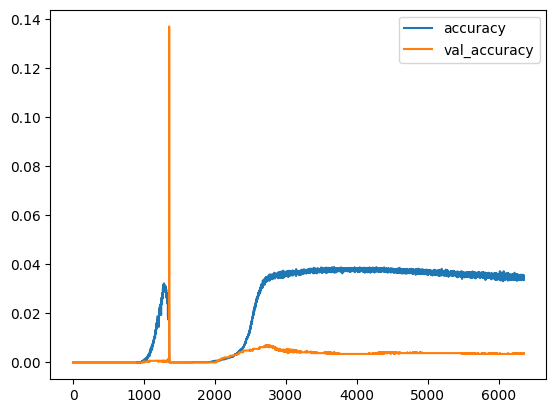

In [27]:
sns.lineplot(model_history.history['accuracy'], label = 'accuracy')
sns.lineplot(model_history.history['val_accuracy'], label = 'val_accuracy')

plt.legend()

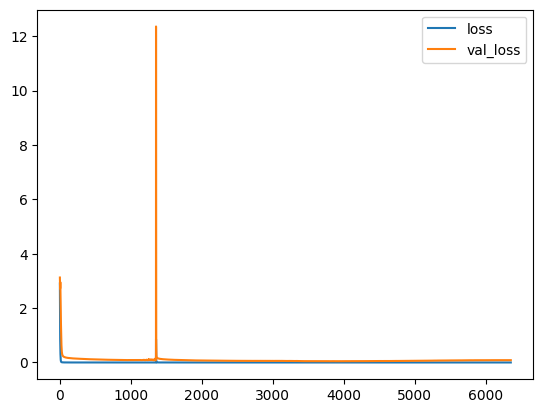

In [28]:
sns.lineplot(model_history.history['loss'], label = 'loss')
sns.lineplot(model_history.history['val_loss'], label = 'val_loss')

plt.legend()

In [22]:
model = tf.keras.models.load_model('model_checkpoints/MultiLayerPerceprtron_basicmotions_1/checkpoint.keras')
dataset = 'BasicMotions'
used_dataset = read_dataset_from_file(dataset_name = dataset)
X, y, metadata = used_dataset

get_dummies_object = GetDummiesLabels(
    X_raw= X,
    y_raw= y,
    metadata= metadata
)

X, y = get_dummies_object.transform()

train_test_object = TrainTestSplit(
    X_raw= X,
    y_raw= y,
    metadata= metadata,
    random_state = 1
)

X_train, X_test, y_train, y_test = train_test_object.transform()
# model.evaluate(X_test, y_test)

In [7]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3125 - f1_score: 0.6000 - loss: 25.7883


[25.78826332092285,
 0.3125,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.        , 0.59999996, 1.        , 0.79999995], dtype=float32)>]

In [8]:
model.metrics

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [4]:
X_train.shape, X_test.shape

((64, 6, 100), (16, 6, 100))

In [ ]:
X, y, metadata = read_dataset_from_file(dataset_name= 'AtrialFibrillation')

In [33]:
from models.fully_convolutional_network import FullyConvolutionalNetwork
from utils_file import training_nn_for_seeds

training_nn_for_seeds(
    datasets= ['ArticularyWordRecognition'], # type: ignore
    seeds= list(range(1, 2)),
    used_model = FullyConvolutionalNetwork
)

In [34]:
from models.resnet import ResNet
from utils_file import training_nn_for_seeds


training_nn_for_seeds(
    datasets= ['ArticularyWordRecognition'], # type: ignore
    seeds= list(range(1, 2)),
    used_model = ResNet
)

  0%|          | 0/1 [00:00<?, ?it/s]

ArticularyWordRecognition - 1


ValueError: Inputs have incompatible shapes. Received shapes (9, 144) and (64, 144)